In [3]:
from sklearn.cluster import DBSCAN
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('/home/phidch/Documents/1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.bitwise_not(img)
_, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
np.unique(img)

array([  0, 255], dtype=uint8)

In [4]:
X = np.where(img==255)
X = np.vstack((X[0], X[1])).T
X.shape

(907, 2)

In [5]:
output = DBSCAN(eps=30, min_samples=2).fit(X)
set(output.labels_)

{0, 1}

In [59]:
tmp_img = np.zeros((600, 1000), dtype=np.uint8)
for i in set(output.labels_):
    pos = np.where(output.labels_==i)[0]
    print(pos.shape)
    for j in pos:
        tmp_img[X[j][0]][X[j][1]] = 255
    break


kernel = 30
tmp_img = cv2.dilate(tmp_img, np.ones((kernel,kernel), np.uint8), iterations=1)
kernel = 20
tmp_img = cv2.erode(tmp_img, np.ones((kernel,kernel), np.uint8), iterations=1)
contours, hierarchy = cv2.findContours(tmp_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0], True)
# tmp_img = cv2.drawContours(np.zeros((600, 1000), dtype=np.uint8), contours, -1, 125, 3)
tmp_img = cv2.drawContours(np.zeros((600, 1000), dtype=np.uint8), [hull], -1, 255, 3)

(461,)


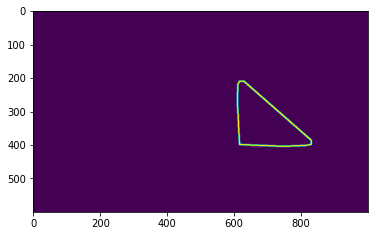

In [60]:
plt.imshow(tmp_img)

In [1]:
def poligon2centroid(poly_x, poly_y):
    x_mean = np.mean(poly_x)
    y_mean = np.mean(poly_y)
    x = poly_x - x_mean
    y = poly_y - y_mean

    #create shifted matrix for counter clockwise bounderies
    xp = np.append(x[1:], x[0])
    yp = np.append(y[1:], y[0])

    #calculate the twice signed area of the elementary triangle formed by
    #(xi,yi) and (xi+1,yi+1) and the origin.
    a = np.dot(x, yp) - np.dot(xp, y)

    #Sum of the half of these areas
    area = np.sum(a)/2

    if area < 0:
        area = -area

    #calculate centroid of the shifted
    xc = np.sum(np.dot((x+xp), a))/(6*area)
    yc = np.sum(np.dot((y+yp), a))/(6*area)

    #shift back to original place
    centroid_x = xc + x_mean
    centroid_y = yc + y_mean
    centroid_radius = 0

    #calculate radius
    for k in range(poly_x.shape[0]):
        dist = np.linalg.norm(np.array([poly_x[k], poly_y[k]])-np.array([centroid_x, centroid_y]))
        if centroid_radius < dist:
            centroid_radius = dist
    return centroid_x, centroid_y, centroid_radius

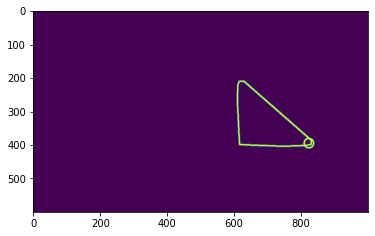

In [63]:
poly_x = hull.reshape((-1,2)).T[0]
poly_y = hull.reshape((-1,2)).T[1]
cenx, ceny, cenr = poligon2centroid(poly_x[1:4], poly_y[1:4])
# cenx, ceny, cenr = poligon2centroid(poly_x[0:1], poly_y[0:1])

cen_img = tmp_img.copy()
cen_img = cv2.circle(tmp_img.copy(), (int(cenx), int(ceny)), int(cenr), 255, 3)
plt.imshow(cen_img)

In [53]:
hull

array([[[629, 209]],

       [[830, 385]],

       [[830, 398]],

       [[810, 401]],

       [[785, 402]],

       [[755, 403]],

       [[739, 403]],

       [[687, 401]],

       [[636, 399]],

       [[616, 398]],

       [[610, 275]],

       [[610, 262]],

       [[611, 219]],

       [[616, 209]]], dtype=int32)